Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from yahoo_fin.stock_info import get_data

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'ETH'
against_currency = 'USD'

start = dt.datetime(2014,1,1)
end = dt.datetime.now()

base_df = get_data(f'{crypto_currency}-{against_currency}', start, end, index_as_date = True, interval = '1d')
base_df

open         high          low        close     adjclose  \
2015-08-06     2.831620     3.536610     2.521120     2.772120     2.772120   
2015-08-07     2.793760     2.798810     0.714725     0.753325     0.753325   
2015-08-08     0.706136     0.879810     0.629191     0.701897     0.701897   
2015-08-09     0.713989     0.729854     0.636546     0.708448     0.708448   
2015-08-10     0.708087     1.131410     0.663235     1.067860     1.067860   
...                 ...          ...          ...          ...          ...   
2021-07-02  2150.834961  2237.567139  2117.590088  2226.114258  2226.114258   
2021-07-03  2226.550293  2384.286865  2190.837646  2321.724121  2321.724121   
2021-07-04  2321.922852  2321.922852  2163.041504  2198.582520  2198.582520   
2021-07-05  2197.919434  2346.294922  2197.919434  2324.679443  2324.679443   
2021-07-06  2323.208496  2403.773438  2298.026855  2315.161865  2315.161865   

                  volume   ticker  
2015-08-06  1.643290e+05  ETH-USD  
2015-08-07  6.741880e+05  ETH-USD  
2015-08-08  5.321700e+05  ETH-USD  
2015-08-09  4.052830e+05  ETH-USD  
2015-08-10  1.463100e+06  ETH-USD  
...                  ...      ...  
2021-07-02  1.743336e+10  ETH-USD  
2021-07-03  1.878711e+10  ETH-USD  
2021-07-04  2.010379e+10  ETH-USD  
2021-07-05  2.089186e+10  ETH-USD  
2021-07-06  2.239835e+10  ETH-USD  

[2162 rows x 7 columns]

In [3]:
base_df['spread'] = base_df.high - base_df.low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2162 entries, 2015-08-06 to 2021-07-06
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      2158 non-null   float64
 1   high      2158 non-null   float64
 2   low       2158 non-null   float64
 3   close     2158 non-null   float64
 4   adjclose  2158 non-null   float64
 5   volume    2158 non-null   float64
 6   ticker    2162 non-null   object 
 7   spread    2158 non-null   float64
dtypes: float64(7), object(1)
memory usage: 152.0+ KB


## Plot the closing value of Ethereum over time

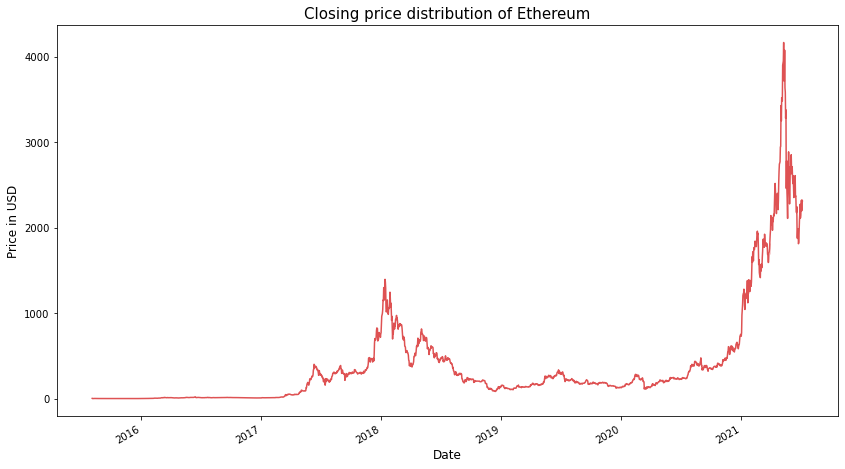

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14,8))

sns.lineplot(y = base_df.close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of Ethereum", fontsize=15)
plt.show()

In [5]:
fig, ax = plt.subplots(figsize=(14,8))

sns.lineplot(y = base_df.spread.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Daily price spread of Ethereum", fontsize=15)

Text(0.5, 1.0, 'Daily price spread of Ethereum')

## Candlestick chart

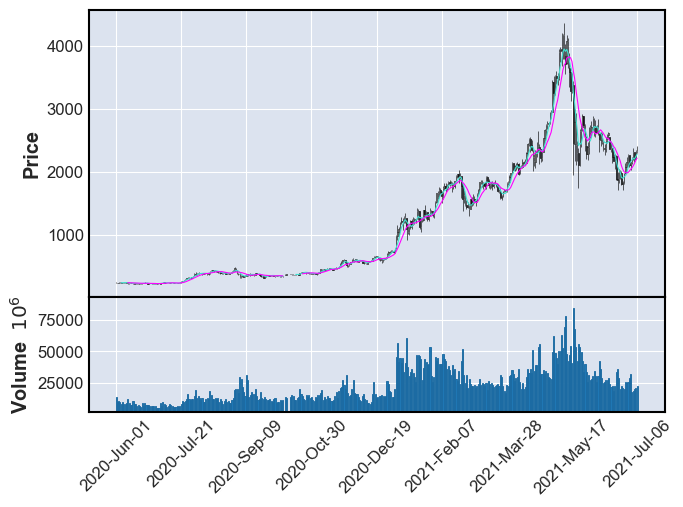

In [6]:
import matplotlib.ticker as mticker
import mplfinance as mpf

temp_base_df = base_df.copy(deep=False)

temp_base_df = temp_base_df.drop(['spread'], axis=1)
mpf.plot(temp_base_df.loc['2020-6-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [7]:
from fbprophet import Prophet

In [8]:
price_predict_df = base_df['close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
#price_predict_df = price_predict_df[price_predict_df['ds']>'2020-6-1']
price_predict_df

ds            y
0    2015-08-06     2.772120
1    2015-08-07     0.753325
2    2015-08-08     0.701897
3    2015-08-09     0.708448
4    2015-08-10     1.067860
...         ...          ...
2157 2021-07-02  2226.114258
2158 2021-07-03  2321.724121
2159 2021-07-04  2198.582520
2160 2021-07-05  2324.679443
2161 2021-07-06  2315.161865

[2162 rows x 2 columns]

In [9]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
#m.add_country_holidays(country_name='CN')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=30)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds         yhat   yhat_lower   yhat_upper
2181 2021-08-01  2630.957410  2459.114647  2794.682305
2182 2021-08-02  2632.234483  2456.380231  2806.680180
2183 2021-08-03  2629.054163  2453.065611  2804.867977
2184 2021-08-04  2630.237630  2463.183622  2809.012028
2185 2021-08-05  2624.422970  2439.399437  2810.299142

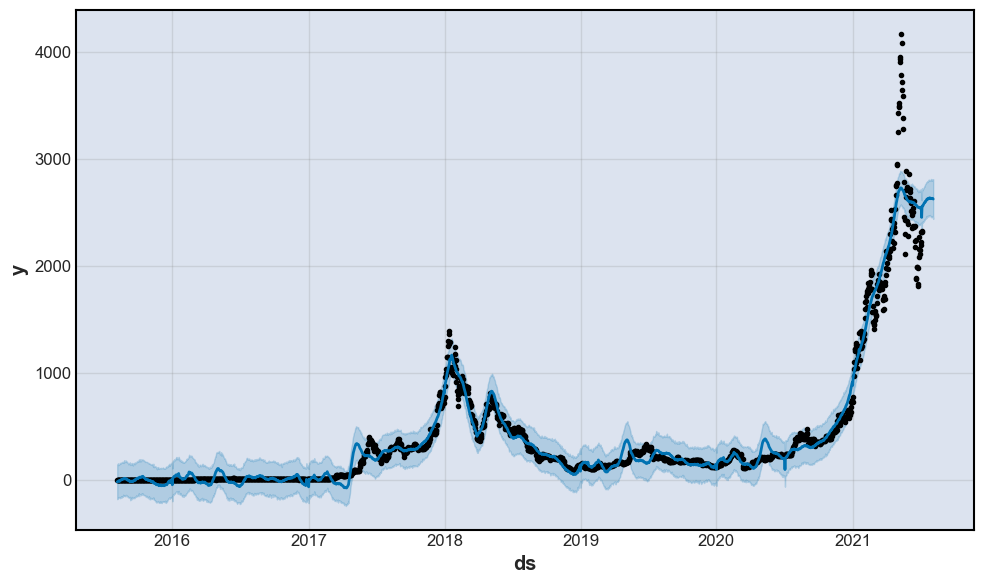

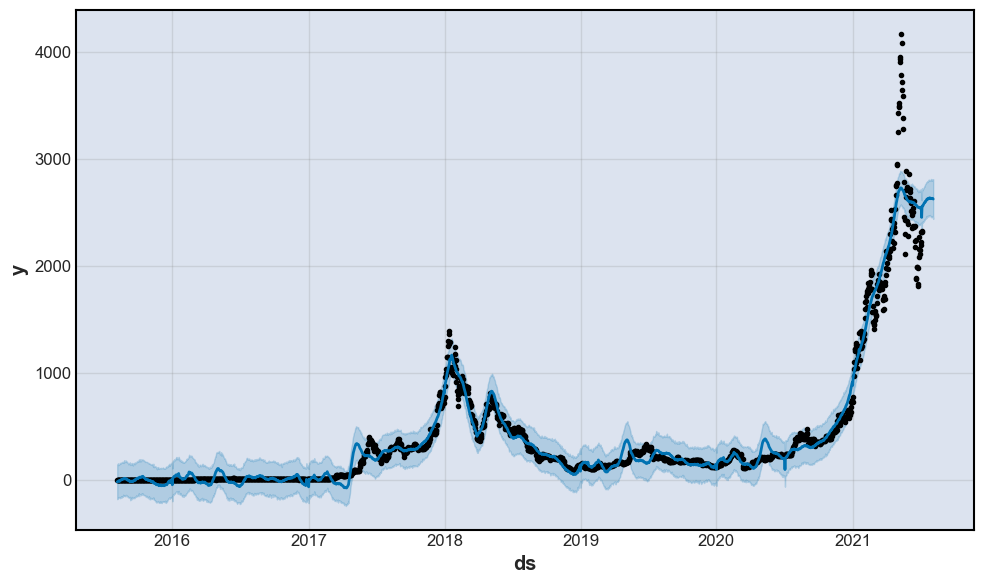

In [10]:
m.plot(forecast)